In [ ]:
# Installation of dyno should refer to https://dynverse.org/users/1-installation/

In [1]:
library(dyno)
library(tidyverse)

Loading required package: dynfeature

Loading required package: dynguidelines

Loading required package: dynmethods

Loading required package: dynplot

Loading required package: dynwrap

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Bifurcation

## Run scAAnet (The following code block should be run in Python)

In [ ]:
import pandas as pd
import scanpy as sc
from scAAnet.api import scAAnet

data = pd.read_csv("../data/trajectory/bifurcating.csv", index_col=0)
adata = sc.AnnData(data)
sc.pp.normalize_total(adata, target_sum=1)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

K = 4
dist = 'ZIP'
methodmap = {"P": "poisson", "ZIP": "zipoisson", 'NB': 'nb', 'ZINB': 'zinb'}
rs = 1

preds= scAAnet(data.loc[:,adata.var.highly_variable], dispersion='gene-cell',
             hidden_size=(128, K, 128), ae_type=methodmap[dist],
             epochs=400, batch_size=32,
             early_stop=100, reduce_lr=10, learning_rate=0.01, 
             warm_up=20, random_state=rs)

recon, usage, spectra = preds['recon'], preds['usage'], preds['spectra']

usage = pd.DataFrame(usage, columns = np.arange(1,(K+1)), index=data.index)
usage.to_csv('../data/trajectory/bifurcating.usage.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

spectra = pd.DataFrame(spectra.transpose(), columns = np.arange(1,(K+1)), 
                       index=data.loc[:,adata.var.highly_variable].columns)
spectra.to_csv('../data/trajectory/bifurcating.program.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

recon = pd.DataFrame(recon, columns=data.loc[:,adata.var.highly_variable].columns, index=data.index)
recon.to_csv('../data/trajectory/bifurcating.recon.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

## Back to R

In [38]:
bif <- readRDS("../data/trajectory/bifurcating.rds")
usage <- read.csv("../data/trajectory/bifurcating.usage.wu20.ZIP.rs1.k4.csv", row.names = 1)

In [23]:
bif <- bif %>% add_dimred(dyndimred::dimred_umap, expression_source = bif$expression)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



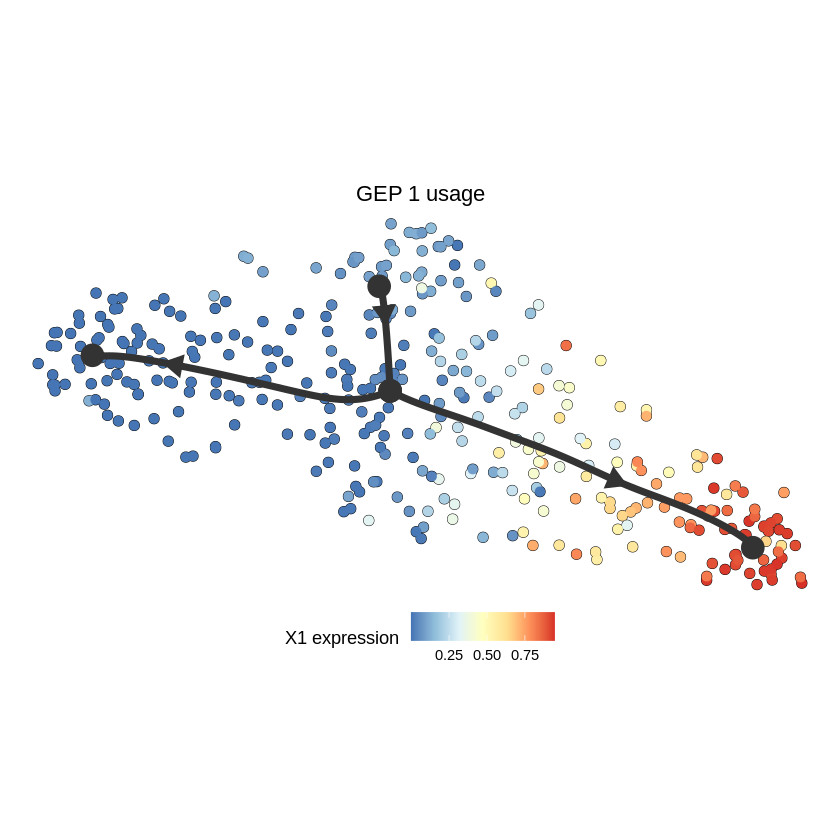

Saving 6.67 x 6.67 in image



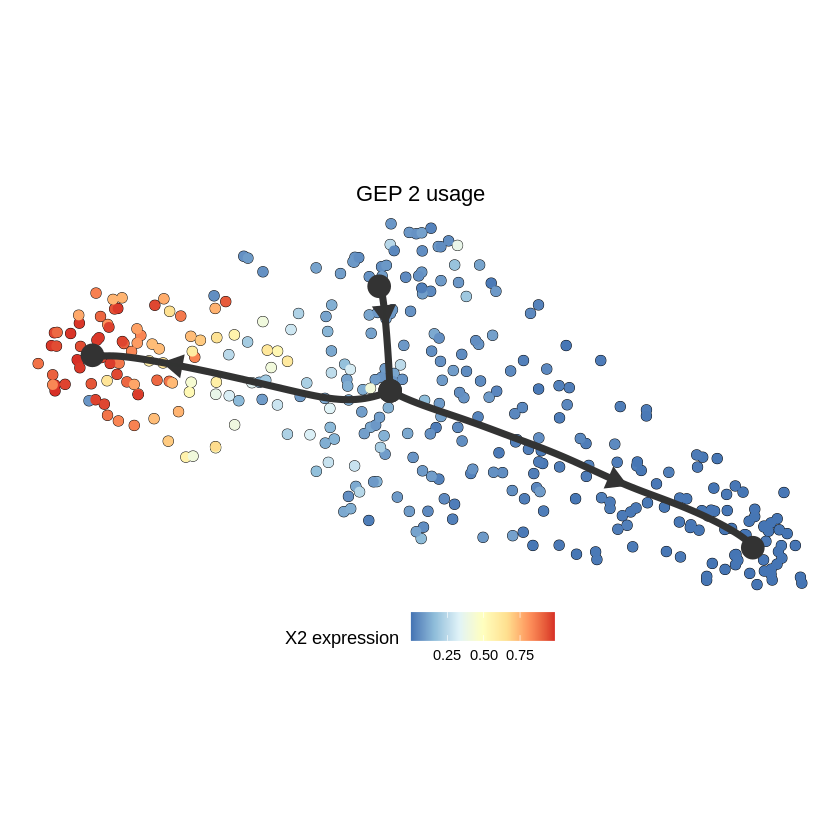

Saving 6.67 x 6.67 in image



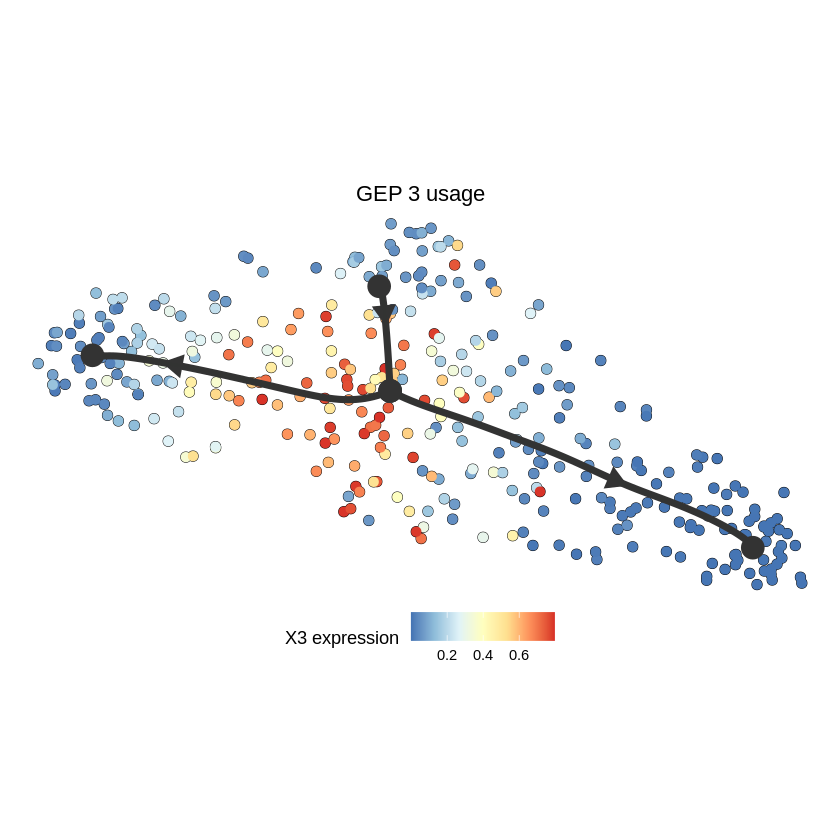

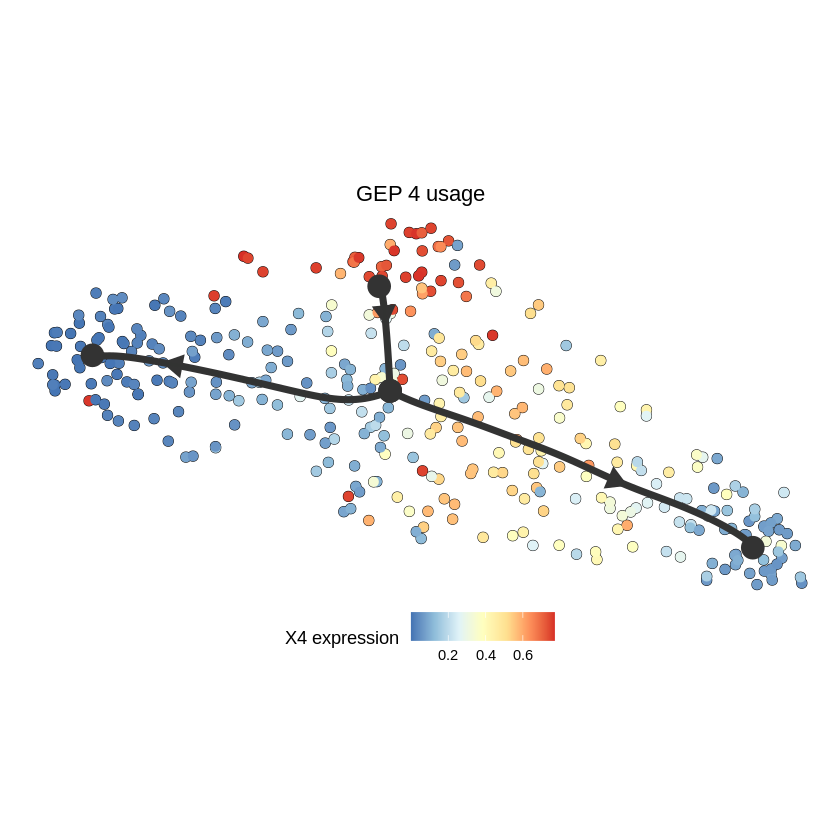

In [39]:
for (i in 1:K){
    print(plot_dimred(
      bif, 'feature',
      expression_source = as.matrix(usage),
      feature_oi = paste0('X',i)
    ) + ggtitle(paste0('GEP ', i, ' usage')))
    ggsave(sprintf("../figures/simulation/bifurcation3_gep%d.pdf", i))
}

# Linear

In [ ]:
## Run scAAnet (The following code block should be run in Python)

In [ ]:
import pandas as pd
import scanpy as sc
from scAAnet.api import scAAnet

data = pd.read_csv("../data/trajectory/linear.csv", index_col=0)
adata = sc.AnnData(data)
sc.pp.normalize_total(adata, target_sum=1)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

K = 3
dist = 'ZIP'
methodmap = {"P": "poisson", "ZIP": "zipoisson", 'NB': 'nb', 'ZINB': 'zinb'}
rs = 1

preds= scAAnet(data.loc[:,adata.var.highly_variable], dispersion='gene-cell',
             hidden_size=(128, K, 128), ae_type=methodmap[dist],
             epochs=400, batch_size=32,
             early_stop=100, reduce_lr=10, learning_rate=0.01, 
             warm_up=20, random_state=rs)

recon, usage, spectra = preds['recon'], preds['usage'], preds['spectra']

usage = pd.DataFrame(usage, columns = np.arange(1,(K+1)), index=data.index)
usage.to_csv('../data/trajectory/linear.usage.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

spectra = pd.DataFrame(spectra.transpose(), columns = np.arange(1,(K+1)), 
                       index=data.loc[:,adata.var.highly_variable].columns)
spectra.to_csv('../data/trajectory/linear.program.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

recon = pd.DataFrame(recon, columns=data.loc[:,adata.var.highly_variable].columns, index=data.index)
recon.to_csv('../data/trajectory/linear.recon.wu20.%s.rs%d.k%s.csv'%(dist, rs, K))

In [40]:
linear <- readRDS("../data/trajectory/linear.rds")
usage <- read.csv("../data/trajectory/linear.usage.wu20.ZIP.rs1.k3.csv", row.names = 1)

In [34]:
linear <- linear %>% add_dimred(dyndimred::dimred_umap, expression_source = linear$expression)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



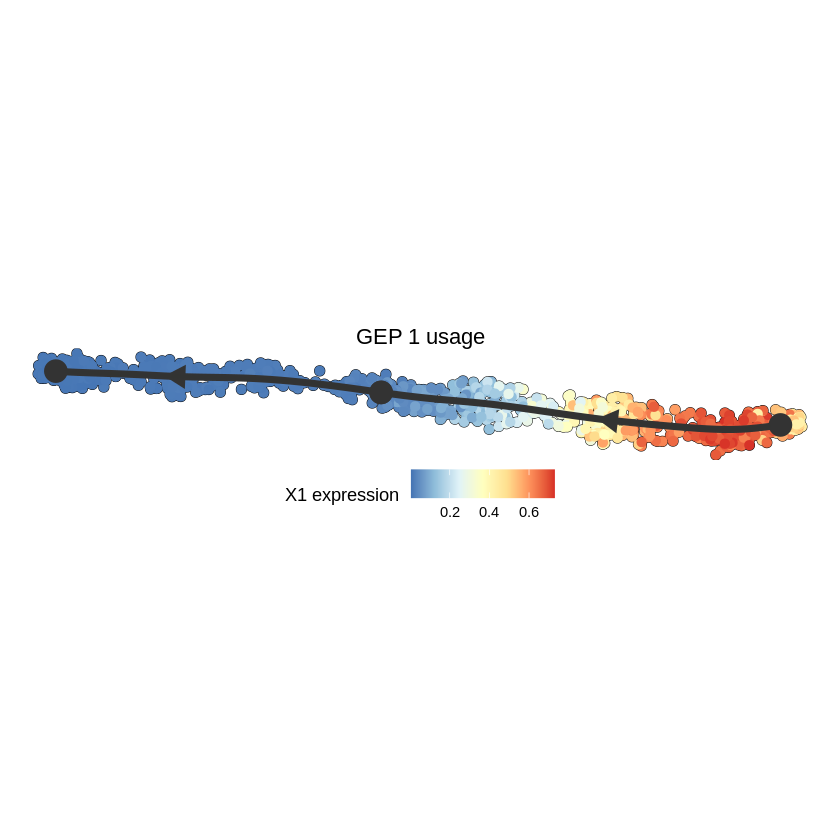

Saving 6.67 x 6.67 in image



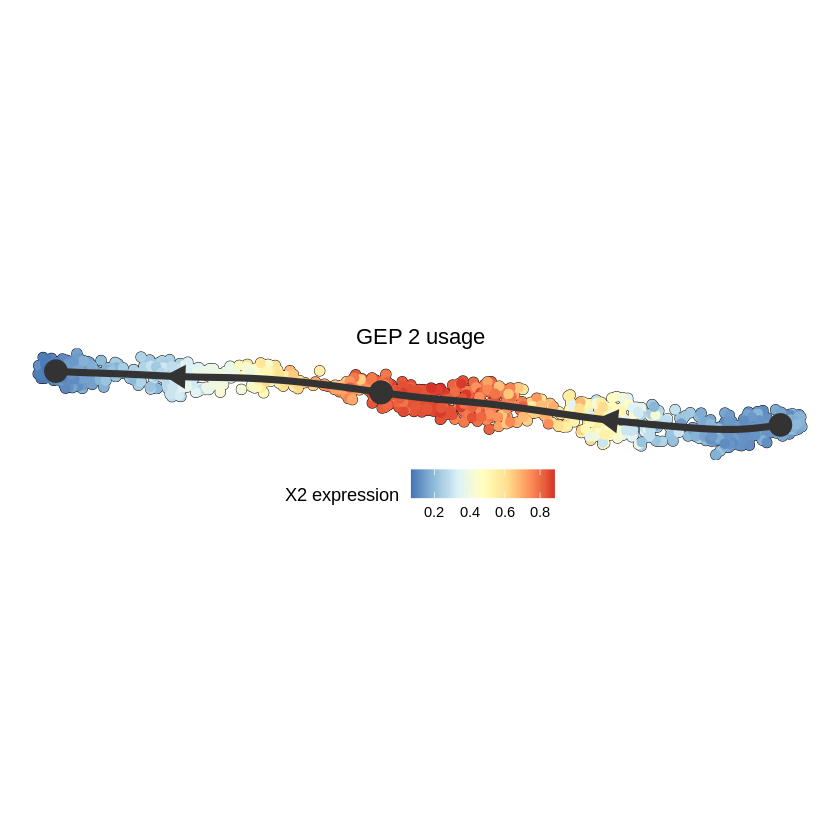

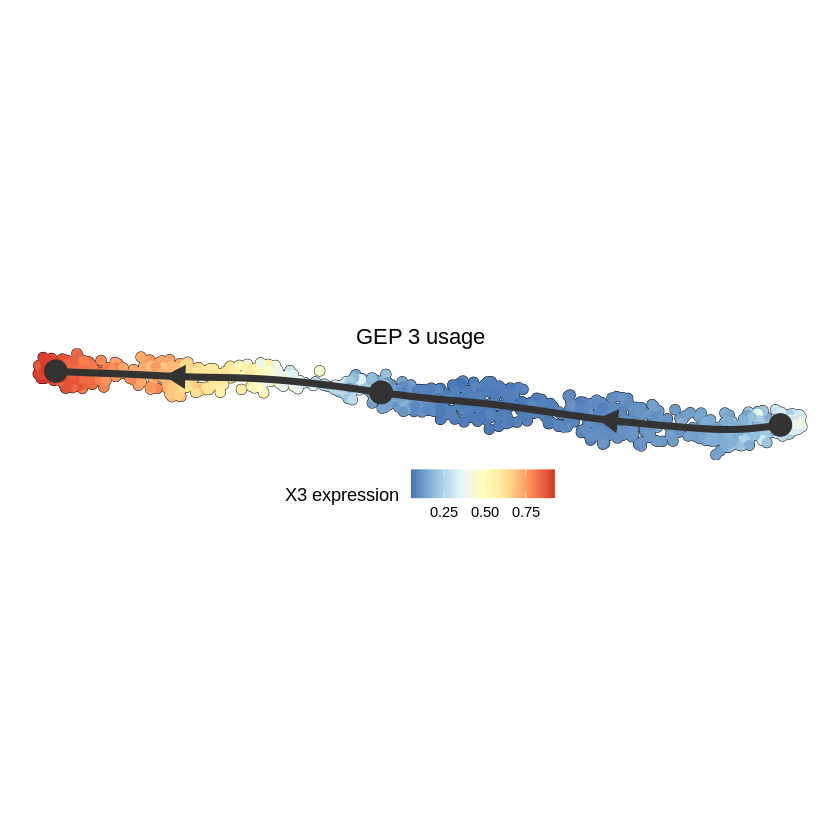

In [41]:
for (i in 1:K){
    print(plot_dimred(
      linear, 'feature',
      expression_source = as.matrix(usage),
      feature_oi = paste0('X',i)
    ) + ggtitle(paste0('GEP ', i, ' usage')))
    ggsave(sprintf("../figures/simulation/linear1_gep%d.pdf", i))
}